$$
\newcommand{\b}[1]{\mathbb{#1}}
\newcommand{\v}[1]{\mathbf{#1}}
\newcommand{\vt}[1]{\mathbf{#1}^\top}
\newcommand{\prob}[1]{\textrm{Pr}\left[ #1 \right]}
$$

# Binary Classification with Logistic Regression

Like every other person new to machine learning, I picked up Andrew Ng's classic [deep learning course](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0). In this article, I will try to give an outline of how logistic regression works and in a later article, I will use these concepts to develop the idea behind a neural network.

## Model

Unlike the linear discriminant that I [wrote about](https://mayantmukul.me/2020/04/29/linear-discriminant-analysis.html) earlier, logistic regression does not minimize errors based on geometric "distance". Instead, it is a probabilistic model and aims to maximize the *likelihood* of a favorable event. Assume that we have two classes ($\Pi_1$ and $\Pi_2$) and their class conditional densities satisfy

$$
\log{\frac{f(\v{x} \vert \Pi_2)}{f(\v{x} \vert \Pi_1)}} = \beta_0 + \vt{\beta} \v{x}
$$

Here $\v{x}$ is a p-dimensional feature vector and $\beta_0, \v{\beta}$ are parameters. We can simplify the statement above with Bayes' Theorem to get the following result.

$$
\begin{aligned}
\prob{\Pi_1 \vert \v{x}} &= \frac{1}{1 + e^{-z}} \\
\prob{\Pi_2 \vert \v{x}} &= \frac{e^{-z}}{1 + e^{-z}} \\
\end{aligned}
$$

Here $z = -\beta_0 - \log{\frac{\prob{\Pi_1}}{\prob{\Pi_2}}} - \vt{\beta}\v{x}$ or in terms of better parameters, $z = b + \vt{w}\v{x}$. To classify our points, we use the following rule.

**Rule:** If $\prob{\Pi_1 \vert \v{x}} \geq \prob{\Pi_2 \vert \v{x}}$, then $\v{x}$ is in $\Pi_1$. In other words, if $b + \vt{w} \v{x} \geq 0$, then $\v{x}$ is in $\Pi_1$.

## The likelihood function

Now that we have our classification rule, we need to develop a technique to estimate the two required parameters. $\v{w}$ is a p-dimensional vector, and $b$ is a scalar. We use a process called ***maximum likelihood estimation*** to find values that would maximize a likelihood function.

Consider a feature $\v{x}$ that we know lies in the class $y$. Let $Y$ be a binary random variable that represents the class that $\v{x}$ belongs to. The likelihood function is a function of the parameters of our model that gives us the value of $\prob{Y = y}$. In other words,

$$
L(b, \v{w} \vert y) = \prob{Y = y \vert b, \v{w}}
$$

Given a particular value of our random variable, the likelihood function gives us the probability of achieving this particular value as a function of our model parameters. In our case, if we define $a = \prob{\Pi_1 \vert \v{x}}$, then

$$
L(b, \v{w} \vert y) =
\begin{cases}
a &: y = 0 \\
1 - a &: y = 1
\end{cases}
$$

Here $y = 0$ indicates $\Pi_1$ and $y = 1$ indicates $\Pi_2$. Since $y$ is discrete, we can write this as a single equation

$$
L(b, \v{w} \vert y) = a^y (1 - a)^{1 - y}
$$

It is important to note here that there are other ways to write this equation, the straight line being the most obvious one. But it turns out that this form is easier to work with when we apply our maximization algorithms.

Now that we have the likelihood for one particular feature $\v{x}$, we can extend this to our entire dataset. Because the likelihood is a probability, we can straight up multiply the likelihoods for all points. As you can guess, it will be more convenient to use the logarithm of the likelihood instead.

$$
\log{L} = \sum_{i = 1}^{m} y_i \log{a_i} + (1 - y_i) \log{(1 - a_i)}
$$

Here $m$ is the number of points in our dataset. Instead of maximizing this likelihood, we can actually minimize its negative with *gradient descent*. We also divide by $m$ to scale it with our dataset. We now get a *cost function* that we will work with.

$$
J(b, \v{w}) = \frac{-1}{m} \sum_{i = 1}^{m} y_i \log{a_i} + (1 - y_i) \log{(1 - a_i)}
$$

## Gradient descent

Gradient descent is an iterative process for minimizing functions. It is based on the fact that the gradient of a function gives us the direction of maximum change. Therefore, the logical way to minimize a function would be to take "steps" in this direction. We choose some value to initialize our parameters with and then update them on each iteration as shown.

$$
\begin{aligned}
w_i^{(n + 1)} &= w_i^{(n)} - \alpha  \left( \frac{\partial J}{\partial w_i} \right)^{(n)} \\
b^{(n + 1)} &= b^{(n)} - \alpha \left( \frac{\partial J}{\partial b} \right)^{(n)}
\end{aligned}
$$


Here $\alpha$ is called the learning rate that determines our "step size", $b^{(n)}$ is the value of that parameter at the end of the $n^{\text{th}}$ iteration and $w_i$ is the $i^{\text{th}}$ component of $\v{w}$. By simple application of the chain rule, we can find all derivatives to be the following. Here $x_{ij}$ is the $i^{\text{th}}$ component of the $j^{\text{th}}$ feature vector.

$$
\begin{aligned}
\frac{\partial J}{\partial w_i} &= \frac{-1}{m} \sum_{j = 0}^{m} (y_j - a_j)x_{ij} \\
\frac{\partial J}{\partial b} &= \frac{-1}{m} \sum_{j = 0}^{m} (y_j - a_j)
\end{aligned}
$$

The expression for the derivative with $b$ is fine, but the one for $\v{w}$ can be better expressed in matrix form with

$$
\begin{aligned}
d\v{w} &= \frac{1}{m} \v{X} \cdot \vt{(A - Y)} \\
\v{X} &=
\begin{pmatrix}
\v{x}_1 & \v{x}_2 & \ldots & \v{x}_m
\end{pmatrix} \\
\v{A} &=
\begin{pmatrix}
a_1 & a_2 & \ldots & a_m
\end{pmatrix} \\
\v{Y} &=
\begin{pmatrix}
y_1 & y_2 & \ldots & y_m
\end{pmatrix} \\
\end{aligned}
$$

Therefore, we update our parameters according to the following equations

$$
\begin{aligned}
\v{w}^{(n + 1)} &= \v{w}^{(n)} - \frac{\alpha}{m} \v{X} \cdot \vt{(A - Y)} \\
b^{(n + 1)} &= b^{(n)} - \frac{\alpha}{m} \sum_{j = 0}^{m}(a_j - y_j)
\end{aligned}
$$

We run the algorithm on our dataset and stop after a predetermined number of iterations to get our parameters $\v{w}$ and $b$. Once these are known, we can apply the rule mentioned earlier to classify our test set.

## Example

Lets use the same dataset that we used in the article on linear discriminant analysis. Red is $\Pi_1$ and green is $\Pi_2$

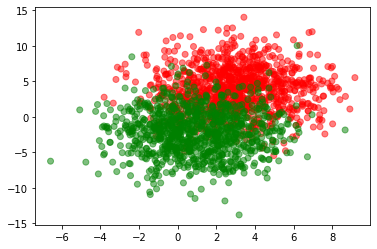

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed to get the same results on each run
np.random.seed(seed=0)

# Initialize parameters
cov = [[5, 0], [0, 10]]
m = 2000

# Generate the data
g1 = np.random.multivariate_normal((3, 4), cov, size=1000).T
g2 = np.random.multivariate_normal((1, -2), cov, size=1000).T
X = np.concatenate((g1, g2), axis=1)
Y = np.concatenate(([[0] * 1000], [[1] * 1000]), axis=1).squeeze()

# Plot the data
colors = np.where(Y == 0, "red", "green")
fig = plt.figure()
ax = fig.add_subplot(111)
plot_x = X[0, :]
plot_y = X[1, :]
ax.scatter(plot_x, plot_y, alpha=0.5, c=colors)

We now define some helper functions to make the final implementation clearer.

In [86]:
def calculate_a(w, b, X):
    z = b + np.dot(w.T, X)
    A = 1 / (1 + np.exp(-z))
    return A

def derivatives(A, X, Y):
    m = X.shape[1]
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    return dw, db

def train(alpha, iter, X_train, Y_train):
    w = np.zeros((2, 1))
    b = 0
    for i in range(iter):
        A = calculate_a(w, b, X_train)
        dw, db = derivatives(A, X_train, Y_train)
        w -= alpha * dw
        b -= alpha * db
    return w, b

def predict(X_train, Y_train, X_test):
    w, b = train(0.5, 1000, X_train, Y_train)
    Y_test = np.zeros(X_test.shape[1])
    A = calculate_a(w, b, X_test)
    for i in range(X_test.shape[1]):
        if A[0][i] >= 0.5:
            Y_test[i] = 0
        else:
            Y_test[i] = 1
    return Y_test

Now we perform the actual gradient descent

In [87]:
predicted = predict(X, Y, X)
print("train accuracy: {} %".format(100 - np.mean(np.abs(predicted - Y)) * 100))

train accuracy: 13.849999999999994 %
